<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
       Importing Required Libraries
    </h2>
    </div>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import spacy
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer,SnowballStemmer,PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from spacy import displacy
from IPython.display import display,Markdown
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import re
from sklearn.svm import SVC

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
       Data Exploration
    </h2>
    </div>

In [2]:
data = pd.read_csv("amazon.csv")

In [3]:
data.head(5)

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [4]:
data.tail(5)

,Text,label
19991,this app is fricken stupid.it froze on the kin...,0
19992,Please add me!!!!! I need neighbors! Ginger101...,1
19993,love it! this game. is awesome. wish it had m...,1
19994,I love love love this app on my side of fashio...,1
19995,This game is a rip off. Here is a list of thin...,0


In [5]:
data.sample(5)

,Text,label
10671,This program only worked when it felt like it....,0
8167,This one works. Tried the other free one. It ...,1
9210,When traveling with my granddaughters (15 & 4 ...,1
8507,It works perfectly for me. No virus no ads no ...,1
19409,This didn't give me any information that I cou...,0


In [6]:
data.label.value_counts()

label
1    15230
0     4766
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [8]:
data.describe()

,label
count,19996.000000
mean,0.761652
std,0.426083
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
data.isnull().sum()

Text     0
label    0
dtype: int64

In [10]:
data[data.duplicated()]

,Text,label


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
       Data Visualization
    </h2>
    </div>

In [11]:
df = data.copy()

In [12]:
cn = df.label.value_counts()

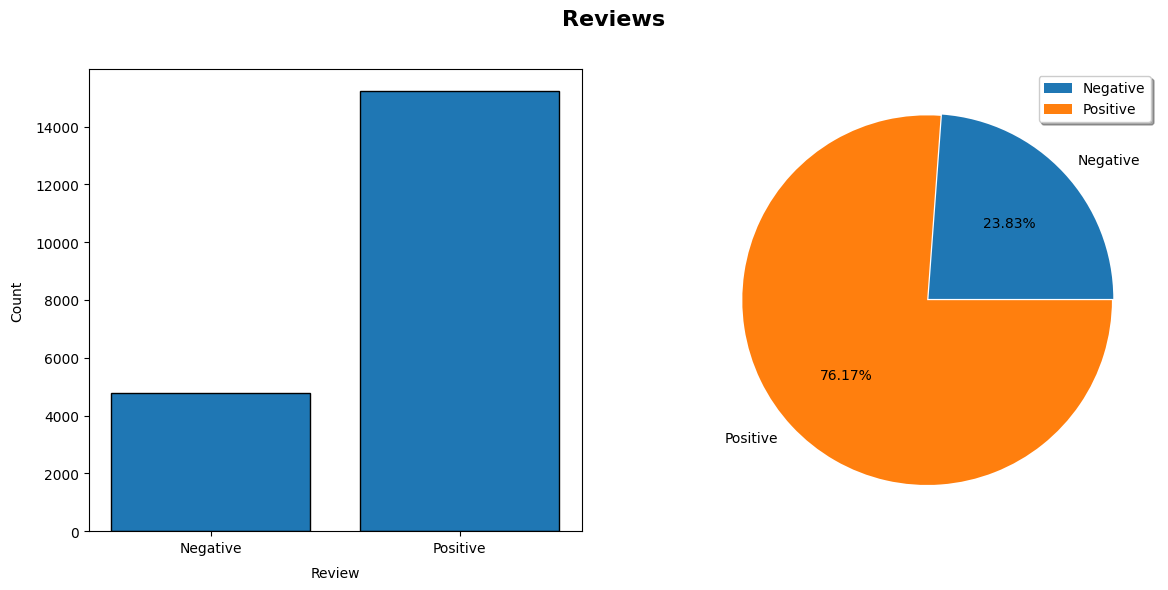

In [13]:
cn = cn.sort_index()
plt.figure(figsize=(14,6))
plt.suptitle("Reviews",fontsize=16,weight='bold')
plt.subplot(1,2,1)
plt.bar(x=cn.index,height=cn.values,edgecolor='black',label=["Negative","Positive"])
plt.xlabel("Review",labelpad=8)
plt.ylabel("Count",labelpad=8)
plt.xticks(ticks=[0,1],labels=["Negative","Positive"])
plt.subplot(1,2,2)
plt.pie(x=cn.values,explode=[0.01,0],autopct="%.2f%%",labels=["Negative","Positive"])
plt.legend(shadow=True)
plt.show()

In [14]:
df["length"] = df["Text"].apply(lambda x: len(x))

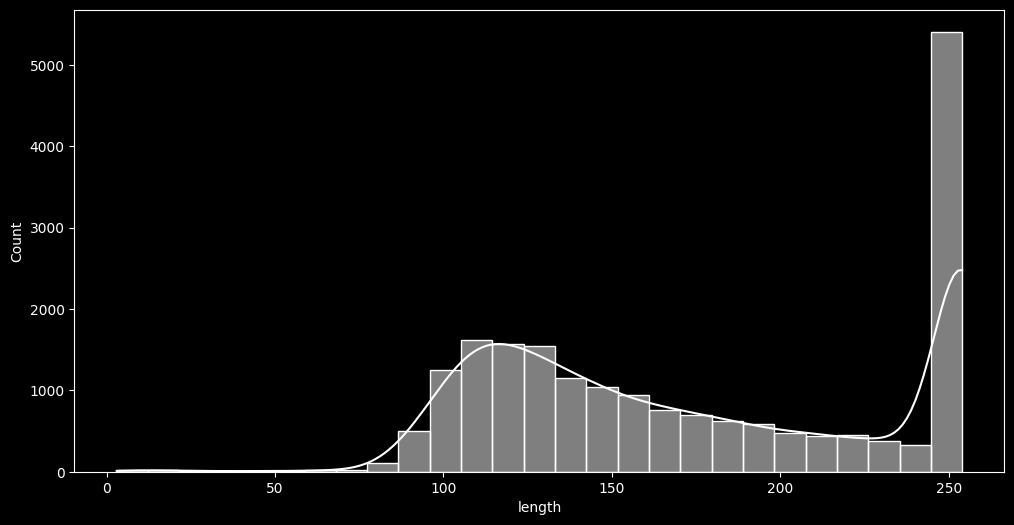

In [15]:
with plt.style.context("dark_background"):
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x="length",kde=True,color="white")
    plt.show()

<ipython-input-17-8327173187d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df,x="label",y="length",palette='autumn')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='label', ylabel='length'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


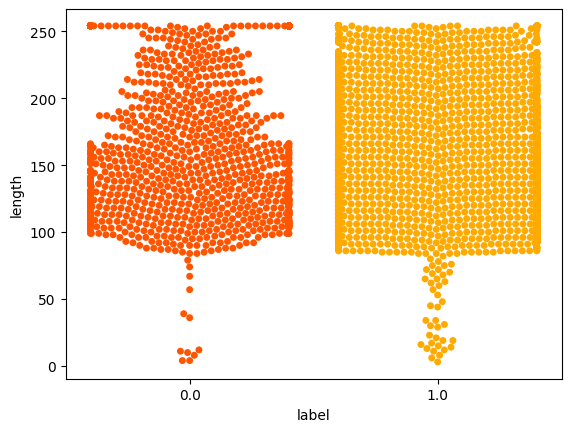

In [17]:
sns.swarmplot(data=df,x="label",y="length",palette='autumn')

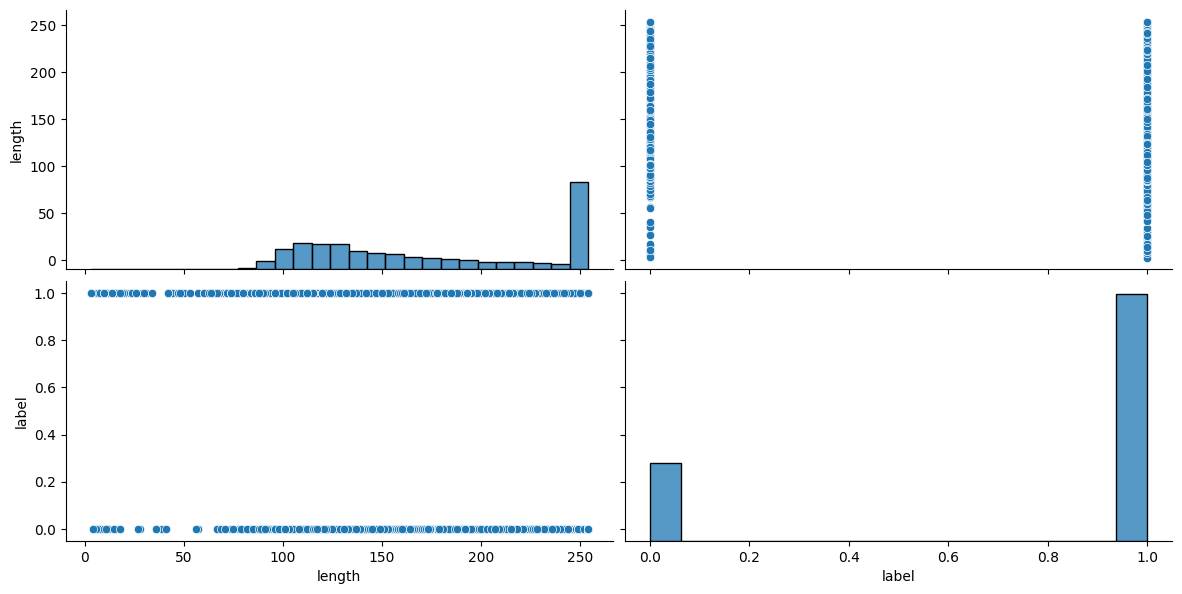

In [19]:
sns.pairplot(df[["length","label"]],aspect=2,height=3)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
       Feature Engineering
    </h2>
    </div>

In [16]:
nlp = spacy.load("en_core_web_lg")

In [17]:
nlp("not")[0].is_stop

True

In [18]:
nlp.Defaults.stop_words.remove("not")
nlp.vocab["not"].is_stop = False

In [19]:
nlp("not")[0].is_stop

False

In [21]:
def process(doc):
    doc = re.sub("\s+\w\s+"," ",doc)
    doc = re.sub("\s+"," ",doc).strip()
    doc = nlp(doc)
    l = []
    for tok in doc:
        if not (tok.is_stop or tok.is_punct or tok.is_space):
            l.append(tok.lemma_)
    return " ".join(l)

In [22]:
data["Text"] = data["Text"].apply(process)

In [23]:
data["Text"]

0        good app acorde bunch people agree bomb egg pi...
1        pretty good version game free lot different le...
2                    bunch level find golden egg super fun
3        silly game frustrating lot fun definitely reco...
4        terrific game pad Hrs fun grandkid love great ...
                               ...                        
19991    app fricken stupid.it freeze kindle will not a...
19992    add need neighbor Ginger1016 thank bunch aweso...
19993    love game awesome wish free stuff house cost f...
19994    love love love app fashion story fight wonderf...
19995    game rip list thing better&bull need real anim...
Name: Text, Length: 19996, dtype: object

In [24]:
tf_idf = TfidfVectorizer()
tf_data = tf_idf.fit_transform(data["Text"])

In [25]:
sm = SMOTE(sampling_strategy="minority")
sm_x,sm_y = sm.fit_resample(tf_data,data["label"])

In [26]:
x_train,x_test,y_train,y_test = train_test_split(sm_x,sm_y,test_size=0.2)

In [27]:
y_train.value_counts()

label
1    12199
0    12169
Name: count, dtype: int64

In [28]:
y_test.value_counts()

label
0    3061
1    3031
Name: count, dtype: int64

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
       Modeling
    </h2>
    </div>

In [29]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
pred = nb.predict(x_test)
accuracy_score(y_test,pred)

0.891661195009849

In [37]:
def train(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    return pred

def eval(pred,model_name):
    print(f"{model_name} Accuracy: {accuracy_score(y_test,pred)}")
    cm = confusion_matrix(y_test,pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt='.4g')
    plt.title("Confusion Matrix",weight='bold',fontsize=16)
    plt.xlabel("True",labelpad=8)
    plt.ylabel("Predicted",labelpad=8)
    plt.show()
    print(classification_report(y_test,pred))

Logistic Regression Accuracy: 0.904629021667761


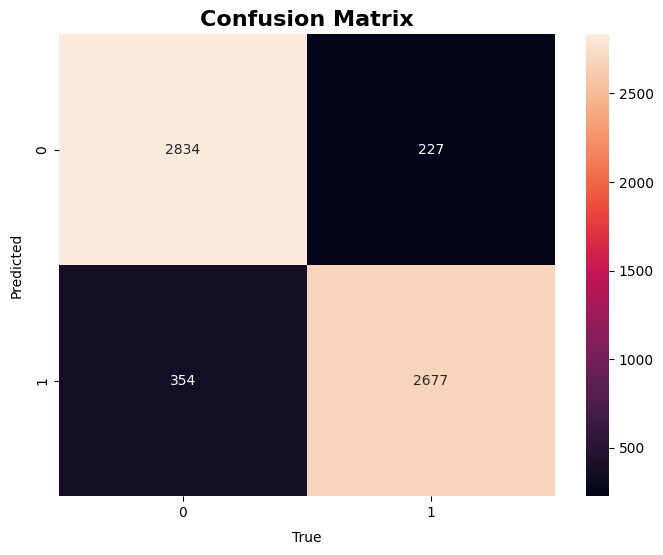

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3061
           1       0.92      0.88      0.90      3031

    accuracy                           0.90      6092
   macro avg       0.91      0.90      0.90      6092
weighted avg       0.91      0.90      0.90      6092



In [38]:
lg = LogisticRegression()
lg_pred = train(lg)
eval(lg_pred,"Logistic Regression")

Multinomial NaiveBayes Accuracy: 0.891661195009849


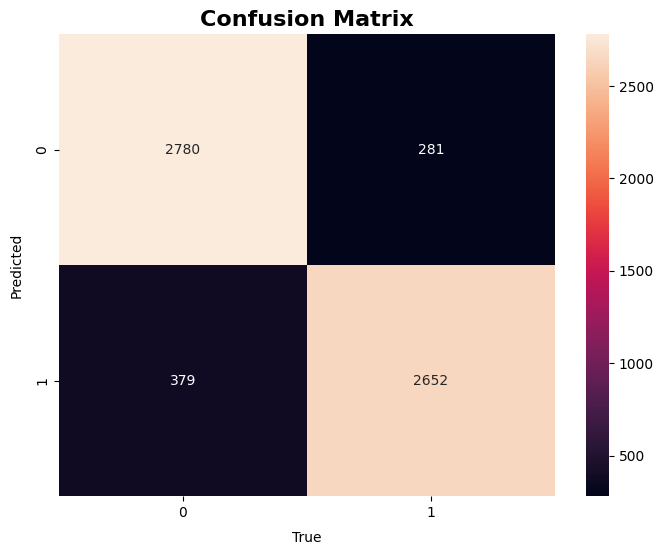

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3061
           1       0.90      0.87      0.89      3031

    accuracy                           0.89      6092
   macro avg       0.89      0.89      0.89      6092
weighted avg       0.89      0.89      0.89      6092



In [45]:
nb = MultinomialNB()
nb_pred = train(nb)
eval(nb_pred,"Multinomial NaiveBayes")

Random Forest Classifier Accuracy: 0.9299080761654629


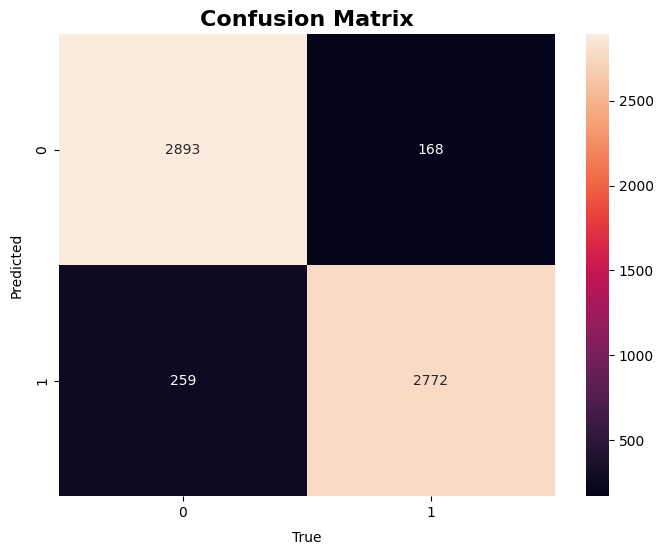

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3061
           1       0.94      0.91      0.93      3031

    accuracy                           0.93      6092
   macro avg       0.93      0.93      0.93      6092
weighted avg       0.93      0.93      0.93      6092



In [47]:
rf = RandomForestClassifier()
rf_pred = train(rf)
eval(rf_pred,"Random Forest Classifier")

Decision Tree Classifier Accuracy: 0.8701575837163493


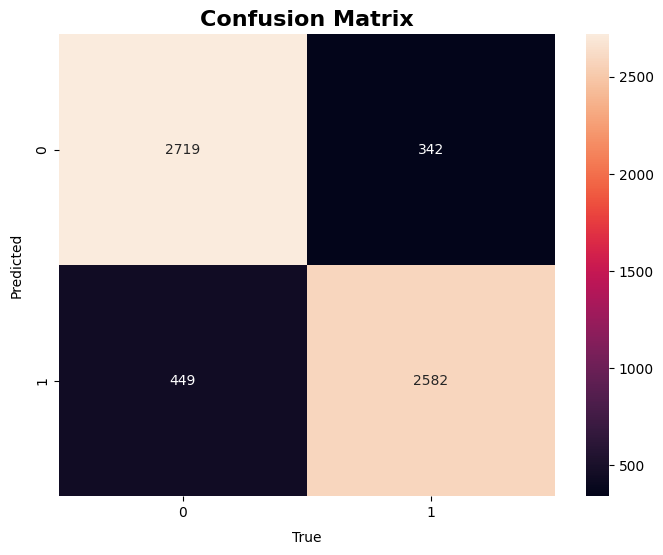

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      3061
           1       0.88      0.85      0.87      3031

    accuracy                           0.87      6092
   macro avg       0.87      0.87      0.87      6092
weighted avg       0.87      0.87      0.87      6092



In [49]:
dt = DecisionTreeClassifier()
dt_pred = train(dt)
eval(dt_pred,"Decision Tree Classifier")

Support Vector Classifier Accuracy: 0.9381155613919895


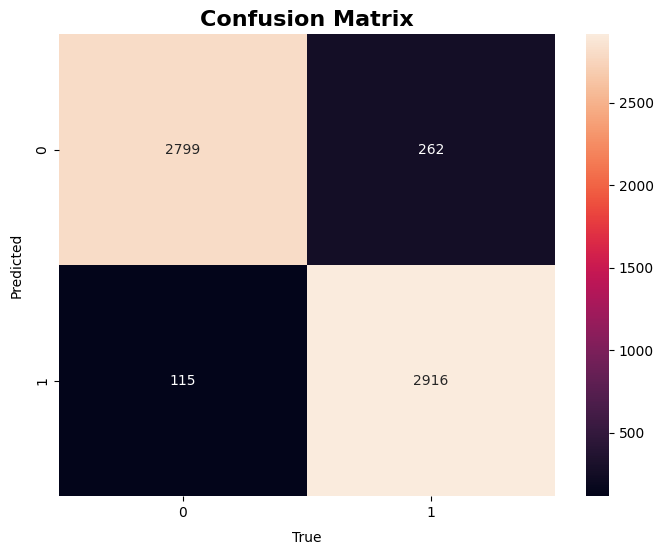

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      3061
           1       0.92      0.96      0.94      3031

    accuracy                           0.94      6092
   macro avg       0.94      0.94      0.94      6092
weighted avg       0.94      0.94      0.94      6092



In [50]:
svc = SVC()
svc_pred = train(svc)
eval(svc_pred,"Support Vector Classifier")

In [51]:
titanfall = pd.read_csv("az_rev.csv")
titanfall.head()

,body,rating
0,Titanfall 2 is a dramatic symphony of astonish...,5.0
1,No other game can compare to this hidden gem! ...,5.0
2,But Also A Great Multiplayer Game If You Haven...,5.0
3,The code is invalid! The code i received was 2...,1.0
4,"If you enjoyed #1, you'll really enjoy this on...",4.0


In [52]:
def test(df):
    df["body"] = df["body"].apply(process)
    pipe = Pipeline(steps=[
        ("tf",tf_idf),
        ("svc",svc)
    ])
    pred = pipe.predict(df["body"])
    return pred

In [62]:
def eval_test(true,pred):
    print(f"Accuracy: {accuracy_score(true,pred)}")
    cm = confusion_matrix(true,pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt='.4g')
    plt.title("Confusion Matrix",weight='bold',fontsize=16)
    plt.xlabel("True",labelpad=8)
    plt.ylabel("Predicted",labelpad=8)
    plt.show()
    print(classification_report(true,pred))

In [54]:
test_pred = test(titanfall)

In [55]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [66]:
true = (titanfall["rating"] > 2).astype(int)

Accuracy: 0.92


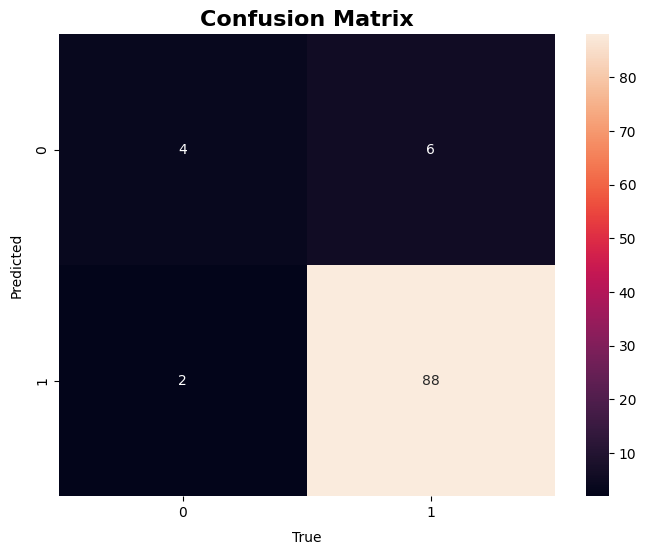

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.94      0.98      0.96        90

    accuracy                           0.92       100
   macro avg       0.80      0.69      0.73       100
weighted avg       0.91      0.92      0.91       100



In [67]:
eval_test(true,test_pred)